In [1]:
import tensorflow as tf

/home/joseph/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import keras

Using TensorFlow backend.


In [32]:
#from keras.datasets import fashion_mnist, mnist
import numpy as np
import pandas as pd


  
Seperate the input vectors with the label & 
Change class label into categorical, or one-hot encoding


In [33]:
from keras.utils import to_categorical
data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')
X_train = np.array(data_train.iloc[:, 1:])
X_test = np.array(data_test.iloc[:, 1:])
y_train = to_categorical(np.array(data_train.iloc[:, 0]))
y_test = to_categorical(np.array(data_test.iloc[:, 0]))


In [36]:
X_train.shape[0]

60000



 #   Reshape the input from flat array to 2D matrix
  #  Normalize the value



In [37]:
img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# The standart way to build a CNN is repeatedly stacking Convolution layer -> Max Pooling layer -> Convolution layer -> Max Pooling layer -> ... and flatten it as an input into fully-connected networks. Dropout layers are used to prevent overfitting

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

input_shape = (img_rows, img_cols, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
__________

In [41]:
r = model.fit(X_train, y_train, validation_split=0.33, epochs=15, batch_size=32)
print("Returned:", r)


Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 38s 946us/step - loss: 0.6111 - acc: 0.7730 - val_loss: 0.3989 - val_acc: 0.8573
Epoch 2/15
40199/40199 [==============================] - 37s 920us/step - loss: 0.4140 - acc: 0.8475 - val_loss: 0.3344 - val_acc: 0.8778
Epoch 3/15
40199/40199 [==============================] - 39s 960us/step - loss: 0.3671 - acc: 0.8651 - val_loss: 0.3042 - val_acc: 0.8874
Epoch 4/15
40199/40199 [==============================] - 39s 981us/step - loss: 0.3377 - acc: 0.8762 - val_loss: 0.2928 - val_acc: 0.8968
Epoch 5/15
40199/40199 [==============================] - 39s 968us/step - loss: 0.3146 - acc: 0.8831 - val_loss: 0.2752 - val_acc: 0.8989
Epoch 6/15
40199/40199 [==============================] - 38s 944us/step - loss: 0.3005 - acc: 0.8892 - val_loss: 0.2668 - val_acc: 0.9056
Epoch 7/15
40199/40199 [==============================] - 37s 927us/step - loss: 0.2857 - acc: 0.8938 - val_loss: 0.

# print available keys

In [42]:
print(r.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


# plot data

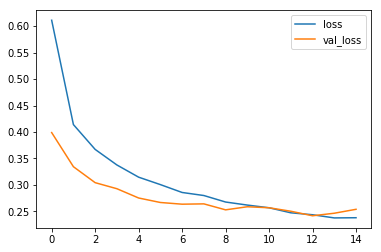

In [43]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies

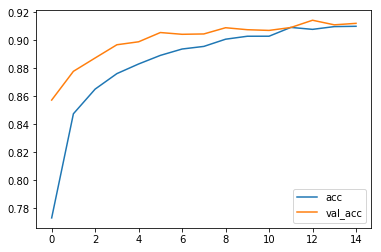

In [44]:
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()